C:\Users\SANGETHA\AppData\Local\Temp\ipykernel_28420\10976335.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dmi_df = pd.read_csv(file_path, comment='#', header=None, delim_whitespace=True)


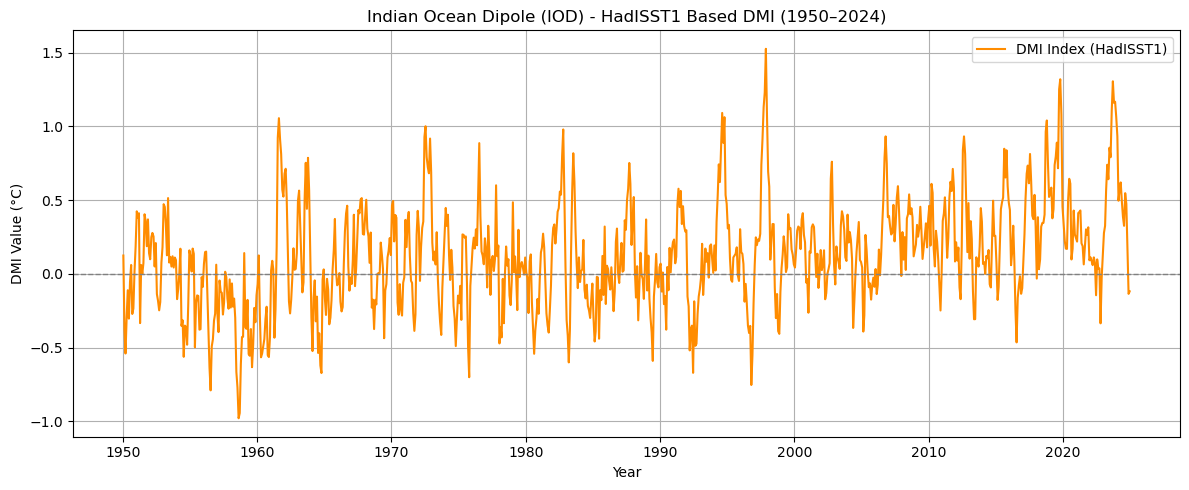

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the file
file_path = "C:/Users/SANGETHA/Downloads/THESIS/dmi_hadisst1.txt"

# Read skipping comment lines and set header manually
dmi_df = pd.read_csv(file_path, comment='#', header=None, delim_whitespace=True)

# Name the columns
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dmi_df.columns = ['Year'] + months

# Reshape from wide to long format
dmi_long = dmi_df.melt(id_vars=['Year'], var_name='Month', value_name='DMI')

# Create datetime column
month_order = {m: i+1 for i, m in enumerate(months)}
dmi_long['Month_num'] = dmi_long['Month'].map(month_order)
dmi_long['Date'] = pd.to_datetime(dict(year=dmi_long['Year'], month=dmi_long['Month_num'], day=15))

# Sort and filter
dmi_long = dmi_long.sort_values('Date')
dmi_filtered = dmi_long[dmi_long['Date'].dt.year >= 1950]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(dmi_filtered['Date'], dmi_filtered['DMI'], color='darkorange', label='DMI Index (HadISST1)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Indian Ocean Dipole (IOD) - HadISST1 Based DMI (1950–2024)")
plt.xlabel("Year")
plt.ylabel("DMI Value (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
# Extract August 2018 DMI value
dmi_aug_2018 = dmi_long[(dmi_long['Year'] == 2018) & (dmi_long['Month'] == 'Aug')]['DMI'].values

if len(dmi_aug_2018) > 0:
    print(f"DMI in August 2018 = {dmi_aug_2018[0]:.2f} °C")
else:
    print("August 2018 data not found.")


DMI in August 2018 = 0.40 °C


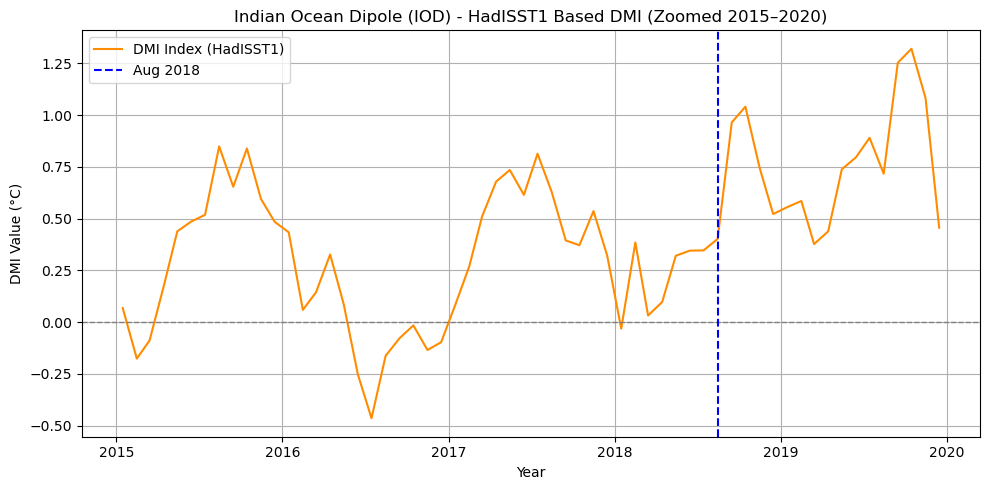

In [9]:
# Filter data between 2015–2020
zoomed_dmi = dmi_filtered[
    (dmi_filtered["Date"] >= pd.to_datetime("2015-01")) &
    (dmi_filtered["Date"] <= pd.to_datetime("2020-01"))
]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(zoomed_dmi['Date'], zoomed_dmi['DMI'], color='darkorange', label='DMI Index (HadISST1)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Highlight August 2018
highlight_date = pd.to_datetime("2018-08-15")
plt.axvline(highlight_date, color='blue', linestyle='--', linewidth=1.5, label='Aug 2018')

# Axis & labels
plt.title("Indian Ocean Dipole (IOD) - HadISST1 Based DMI (Zoomed 2015–2020)")
plt.xlabel("Year")
plt.ylabel("DMI Value (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
# Double check August 2018 DMI value
dmi_aug_2018 = dmi_long[(dmi_long['Year'] == 2018) & (dmi_long['Month'] == 'Aug')]

print(dmi_aug_2018[['Year', 'Month', 'DMI']])


      Year Month       DMI
1233  2018   Aug  0.402245


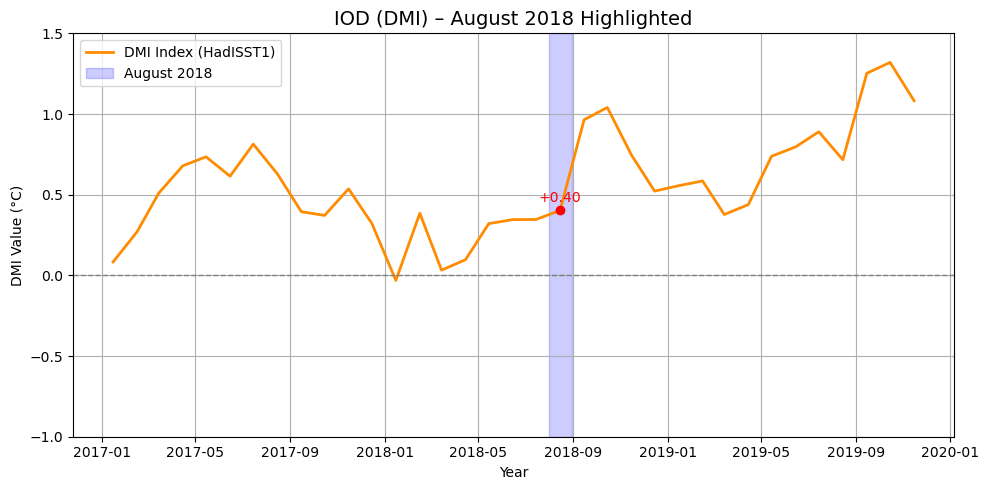

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Use your already created 'dmi_long' and 'dmi_filtered'

# Highlight range: full August 2018
highlight_start = pd.to_datetime("2018-08-01")
highlight_end = pd.to_datetime("2018-08-31")
highlight_mid = pd.to_datetime("2018-08-15")
highlight_value = 0.402245

# Filter data between 2017 and 2019 for better context
zoomed_dmi = dmi_filtered[
    (dmi_filtered["Date"] >= pd.to_datetime("2017-01")) &
    (dmi_filtered["Date"] <= pd.to_datetime("2019-12"))
]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(zoomed_dmi['Date'], zoomed_dmi['DMI'], color='darkorange', label='DMI Index (HadISST1)', linewidth=2)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Shade August 2018
plt.axvspan(highlight_start, highlight_end, color='blue', alpha=0.2, label='August 2018')

# Dot and annotation
plt.plot(highlight_mid, highlight_value, 'o', color='red')
plt.text(highlight_mid, highlight_value + 0.05, "+0.40", color='red', ha='center')

# Labels and limits
plt.title("IOD (DMI) – August 2018 Highlighted", fontsize=14)
plt.xlabel("Year")
plt.ylabel("DMI Value (°C)")
plt.ylim(-1, 1.5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
